In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import CHILDES_DFS, DATA_DIR
from childes_mi.utils.general import flatten

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
transcript_df = pd.read_pickle(CHILDES_DFS/'childes_df_subset.pickle')
#transcript_df['dataset'] = [i[0].split('/')[11] for i in transcript_df.transcript_xml.values]
len(transcript_df)

2785

In [5]:
# mask for only a subset of corpuses
possible_corpuses = [
    # carterette is also transcribed in IPA
    "Carterette",  # 1st, 3rd, 5th grade, adults, speech naturalistic speech in IPA https://childes.talkbank.org/access/Eng-NA/Carterette.html
    "Gillam",  # normal subset, spontaneous storytelling 5-11y11m https://childes.talkbank.org/access/Clinical-MOR/Gillam.html
    "Braunwald",  # single subject from 1-6yo talking to family https://childes.talkbank.org/access/Eng-NA/Braunwald.html
    "Brown",  # 1y6m-5y1m, 3 subjects naturalistic talking to parents https://childes.talkbank.org/access/Eng-NA/Brown.html
    "EllisWeismer",  # 2y6m - 5y6 naturalistic play-oriented talk with instructor # https://childes.talkbank.org/access/Clinical-MOR/EllisWeismer.html
    "Gleason",  # 2;1 - 5;2 family interactions https://childes.talkbank.org/access/Eng-NA/Gleason.html
    "NH",# Nicholas-NH,  # 1;0-4;0, videotaped play with parent https://childes.talkbank.org/access/Clinical-MOR/Nicholas/NH.html
    "Post",  # 1;7-2;8 60m session with family and toys https://childes.talkbank.org/access/Eng-NA/Post.html
    "Normal",  #  Rondal-Normal 3-12yo free play with mother and child https://childes.talkbank.org/access/Clinical-MOR/Normal /Normal.html
]
corpus_mask = [corpus in possible_corpuses for corpus in transcript_df.corpus.values]
transcript_df = transcript_df[corpus_mask]

In [6]:
# mask for a subset of roles
possible_roles = ['Target_Child', 'Child']
role_mask = [role in possible_roles for role in transcript_df.role.values]
transcript_df = transcript_df[role_mask]
len(transcript_df)

2785

In [7]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS,age_months,age_years
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,19903,2102,2102,72.0,6.0
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,26941,2729,2729,120.0,10.0
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,21419,2019,2019,96.0,8.0


In [8]:
transcript_df['n_words'] = [len(np.concatenate(i)) if len(i) > 0 else 0 for i in transcript_df.words.values]

In [9]:
print(transcript_df.corpus.unique())

['Carterette' 'Brown' 'Braunwald' 'Post' 'Gleason' 'Normal' 'Gillam'
 'EllisWeismer' 'NH']


In [10]:
print("there are {} words in this dataset".format(np.sum(transcript_df.n_words.values)))

there are 1247296 words in this dataset


### Get child ages

In [11]:
import re
def convert_age(age_year):
    "Caclculate age in months from a string in CHILDES format"
    if age_year[-1] == 'Y':
        age_year += '0'
    m = re.match("P(\d+)Y(\d+)M?(\d?\d?)D?", age_year)
    age_month = int(m.group(1)) * 12 + int(m.group(2))
    try:
        if int(m.group(3)) > 15:
            age_month += 1
    # some corpora don't have age information?
    except ValueError as e:
        pass
    return age_month

In [12]:
transcript_df["age_months"] = [
    convert_age(i) if type(i) == str else np.nan for i in tqdm(transcript_df.age.values)
]
transcript_df["age_years"] = transcript_df["age_months"] / 12

In [13]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS,age_months,age_years
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,19903,2102,2102,72.0,6.0
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,26941,2729,2729,120.0,10.0
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,21419,2019,2019,96.0,8.0


In [14]:
import seaborn as sns
from childes_mi.utils.paths import DATA_DIR, FIGURE_DIR, ensure_dir
from childes_mi.utils.general import flatten,save_fig
ensure_dir(FIGURE_DIR/ 'distributions')

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


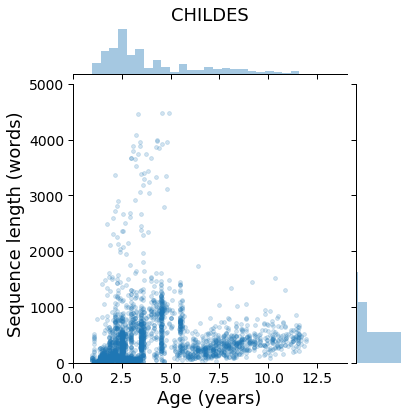

In [15]:
sns.set_context("paper", rc={"font.size":24,"axes.titlesize":18,"axes.labelsize":18, "axes.ticksize":14})   

p = sns.jointplot("age_years", "n_words", data=transcript_df, alpha=0.2, annot_kws={"size": 16}, s=15)

p.set_axis_labels(xlabel="Age (years)", ylabel="Sequence length (words)")
p.ax_joint.tick_params(labelsize=14)
p.ax_marg_x.set_title("CHILDES")
p.ax_joint.set_ylim([0,5000])
p.ax_joint.set_xlim([0,14])
#save_fig(FIGURE_DIR/ 'distributions' / 'childes_distribution')
plt.show()

In [16]:
np.mean(transcript_df.n_words)

447.862118491921

### dataset statistics

In [17]:
age_cohorts = [[1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 20]]

In [18]:

for (age_cohort_low, age_cohort_high) in tqdm(age_cohorts):
    
    cohort_subset = transcript_df[
        (transcript_df.age_months/12 > age_cohort_low) & (transcript_df.age_months/12 <= age_cohort_high)
    ]
    
    cohort_words = [[i for i in list(flatten(row.words)) if i not in [None, 'xxx']] for idx, row in cohort_subset.iterrows()]
    
    n_words = len(np.concatenate(cohort_words))
    n_unique_words = len(np.unique(np.concatenate(cohort_words)))
    
    print(age_cohort_low, age_cohort_high, np.median([len(i) for i in cohort_words]), n_words, n_unique_words)
    #plt.hist([len(i) for i in cohort_words])
    #plt.show()

1 1.5 38.0 15154 1239
1.5 2 98.0 57580 3199
2 2.5 204.0 167722 5363
2.5 3 121.5 110580 4995
3 20 394.0 855307 14410



## MI
- for each sequence, calculate the decay of a sequence as a function of distance between elements for that sequence indiividually
- Treat each phoneme as unique for that child, and compute MI across children

In [19]:
from childes_mi.information_theory import mutual_information as mi

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.cluster.supervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics.cluster. Anything that cannot be imported from sklearn.metrics.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.cluster.expected_mutual_info_fast module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics.cluster. Anything that cannot be imported from sklearn.metrics.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Run MI by age cohort

In [20]:
distances = np.arange(1,101)

In [21]:
def remove_repeats(sequence):
    if len(sequence) == 0:
        return sequence
    a = np.array(sequence[1:])
    b = np.array(sequence[:-1])
    c = [sequence[0]] + list(a[a != b])
    return c

In [22]:
def quickplot_decay(distances, MI, shuff_MI, title=''):
    fig,axs = plt.subplots(ncols=2, figsize = (10,4))
    ax = axs[0]
    ax.set_title(title)
    ax.scatter(distances, MI-shuff_MI)
    ax.plot(distances, MI-shuff_MI, alpha = 0)
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax = axs[1]
    ax.scatter(distances, MI)
    ax.scatter(distances, shuff_MI)
    plt.show()

In [23]:
cohort_subset[:5]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS,age_months,age_years
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,19903,2102,2102,72.0,6.000000
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,26941,2729,2729,120.0,10.000000
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,21419,2019,2019,96.0,8.000000
72304,11312/c-00015846-1,eng,Carterette,1984-01-01,CHI,Target_Child,P16Y,eng,NaN,"[[pro:rel, cop, pro:per, adj], [adv, pro:rel],...","[[where, were, you, born], [really, where], [o...","[[where, be-PAST, you, born], [really, where],...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,15610,1796,1796,192.0,16.000000
79014,11312/c-00015654-1,eng,Brown,1963-08-30,CHI,Target_Child,P3Y01M26D,eng,male,"[[det:num, n], [det:num, n], [det:num, n], [qn...","[[one, busses], [two, busses], [three, busses]...","[[one, buss-PL], [two, buss-PL], [three, buss-...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,3646,957,957,38.0,3.166667


In [24]:
print(' '.join(cohort_words[0][:200]))

you mean uh um like England or something when we walk home from school I walk home with two friends and sometimes we can't run home from school though because um one girl where every time she wants to runs she gets the wheezes and stuff and then she can't breathe very well and she gets sick that's why we can't run I like to go to my grandmother's house well because she gives us candy well um we eat there sometimes sometimes we sleep overnight there sometime when I go to go to my cousin's I get to play softball or play badminton and all that thing I hate to play is doctor oh I hate to play doctor or house or that don't like it or stuff we've been learning a_lot_of Spanish words our teacher speaks Spanish sometimes so does my father yyy well my father doesn't know very much Spanish but he doesn't know what gray is in Spanish and its  and he doesn't and he knows what blue is in Spanish and he knows what um red is in Spanish and sometimes I like to go to Mexico but I've never been there be

['more', 'cookie', 'more', 'cookie', 'more']
['man' 'Eve' 'spoon' 'finger' 'pencil']
['qn', 'n', 'qn', 'n', 'qn']
['cookie', 'more', 'cookie', 'more', 'juice']
['a', 'stool', 'that', 'read', 'Eve']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    4.0s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    4.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of 100 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


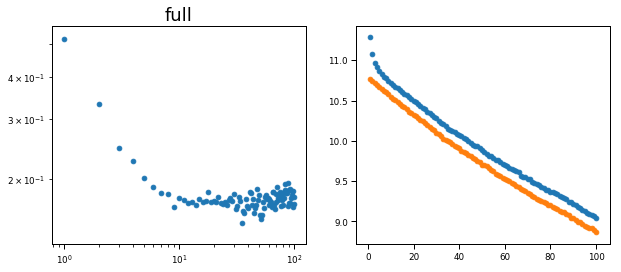

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  32 out of 100 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  32 out of 100 | elapsed:    0.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


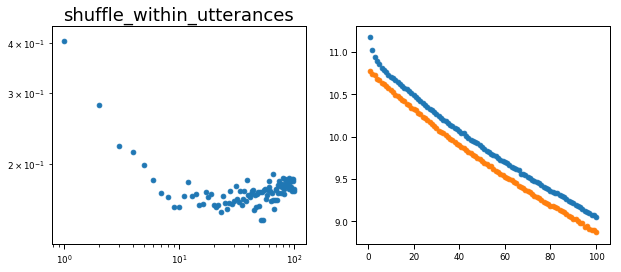

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of 100 | elapsed:    0.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  32 out of 100 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished


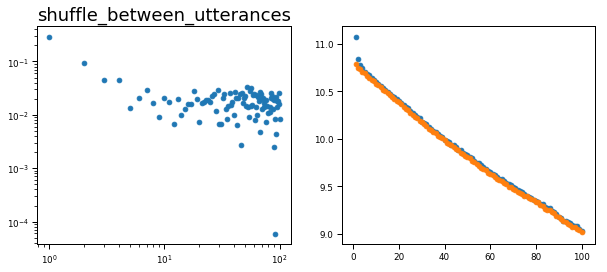

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of 100 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of 100 | elapsed:    0.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


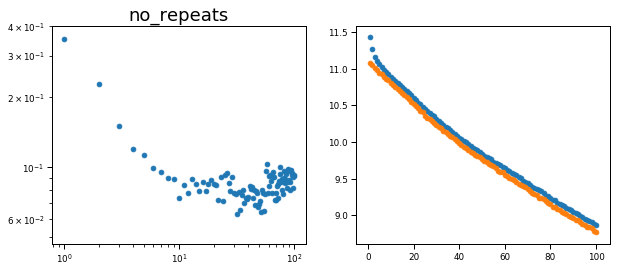

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of 100 | elapsed:    0.2s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  32 out of 100 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of 100 | elapsed:    0.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


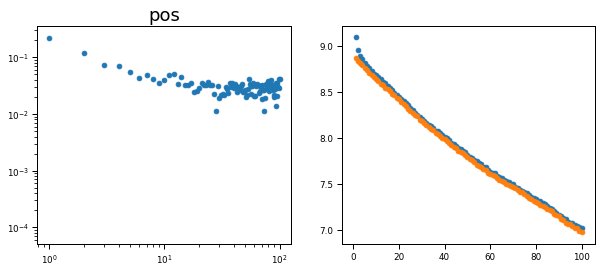

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of 100 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  32 out of 100 | elapsed:    0.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


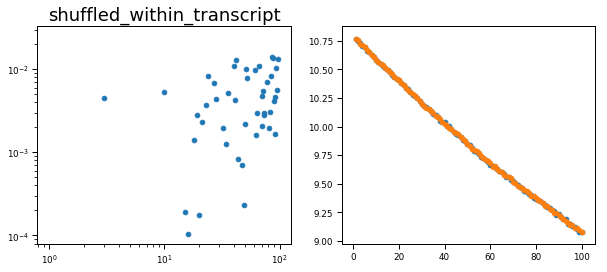

['peep', 'peep', 'yeah', 'blocks', 'one']
['Eve' 'Mommy' 'here' 'one' 'yeah']
['on', 'co', 'n', 'det:num', 'det:num']
['peep', 'peep', 'yeah', 'blocks', 'one']
['Papa', 'penny', 'out', 'sugar', 'soup']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    1.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


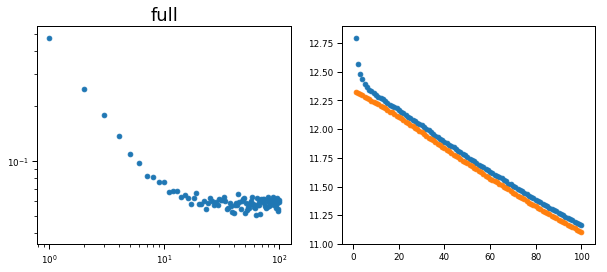

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


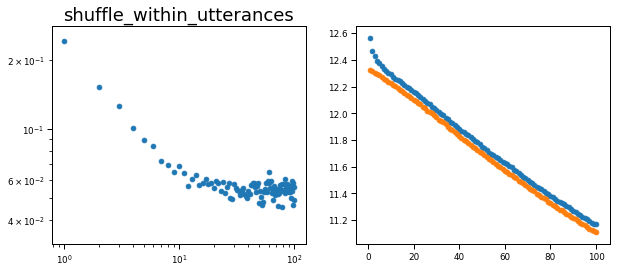

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


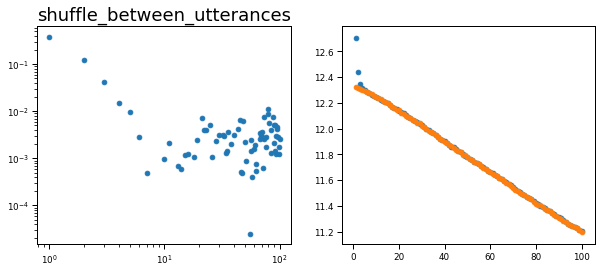

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished


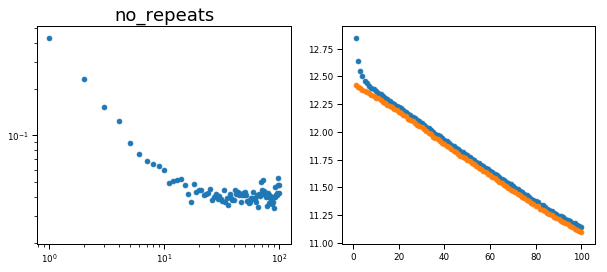

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  32 out of 100 | elapsed:    0.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    1.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.4s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  32 out of 100 | elapsed:    0.7s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    1.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


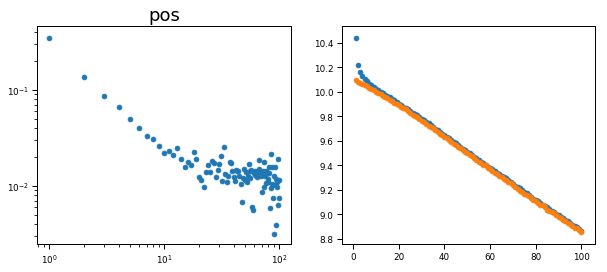

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    1.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  74 out of 100 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  95 out of 100 | elapsed:    2.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


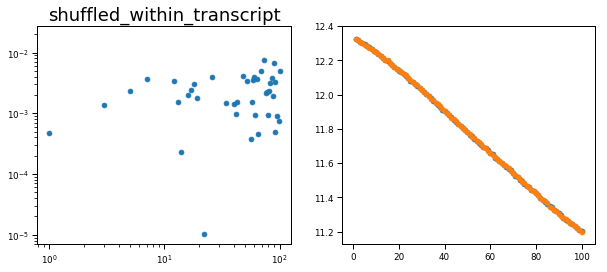

['play', 'checkers', 'big', 'drum', 'big']
['dat' 'go' 'tired' 'Bu' 'Mommy']
['n', 'n', 'adj', 'n', 'adj']
['play', 'checkers', 'drum', 'big', 'drum']
['Catherine', 'too', 'get', 'in', 'kitty']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 198 out of 204 | elapsed:    9.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:   10.1s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 198 out of 204 | elapsed:   10.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:   10.3s finished


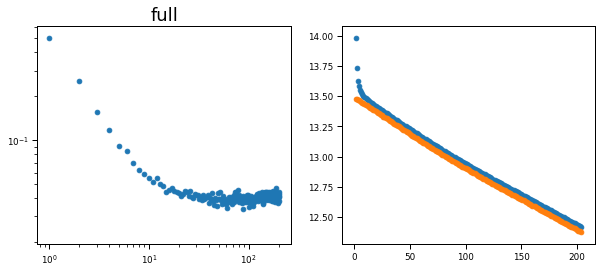

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 198 out of 204 | elapsed:    9.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:   10.1s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 198 out of 204 | elapsed:   10.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:   10.4s finished


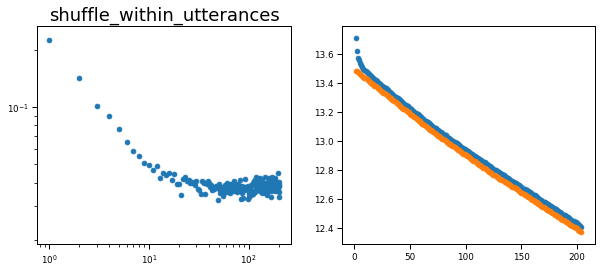

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 198 out of 204 | elapsed:   10.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:   10.3s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 198 out of 204 | elapsed:   10.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:   10.5s finished


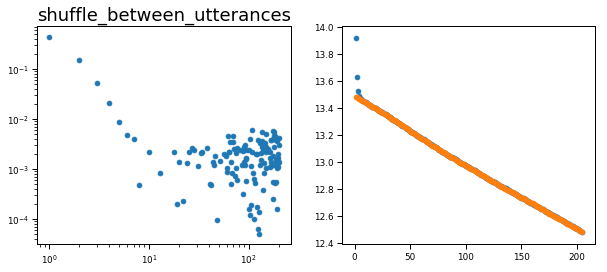

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 198 out of 204 | elapsed:    9.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    9.6s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 198 out of 204 | elapsed:    9.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:   10.1s finished


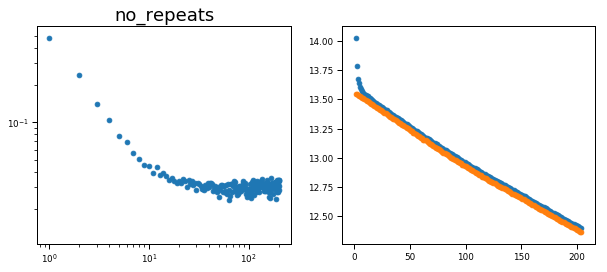

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 198 out of 204 | elapsed:    6.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    6.4s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 198 out of 204 | elapsed:    6.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:    6.4s finished


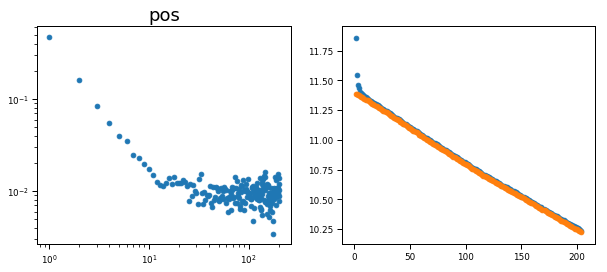

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 198 out of 204 | elapsed:   10.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:   10.4s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 198 out of 204 | elapsed:   10.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 204 out of 204 | elapsed:   10.5s finished


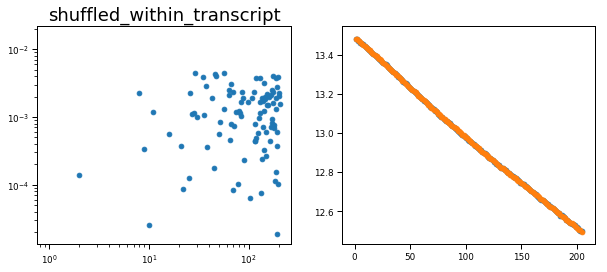

['this', 'is', 'heavy', 'saggy', 'baggy']
['come' 'wh' 'go' 'that' 'u']
['pro:dem', 'cop', 'adj', 'adj', 'adj']
['heavy', 'this', 'is', 'all', 'eat']
['you', 'watch', 'you', 'got', 'it']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  99 out of 121 | elapsed:    4.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    4.5s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  99 out of 121 | elapsed:    4.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    4.7s finished


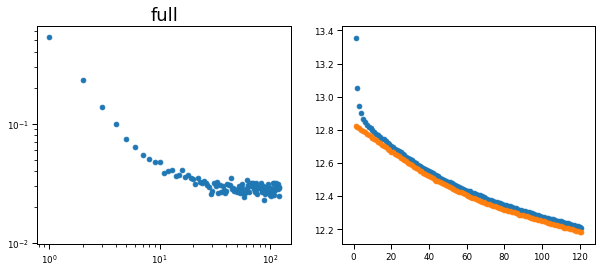

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  99 out of 121 | elapsed:    4.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    4.6s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  99 out of 121 | elapsed:    4.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    4.6s finished


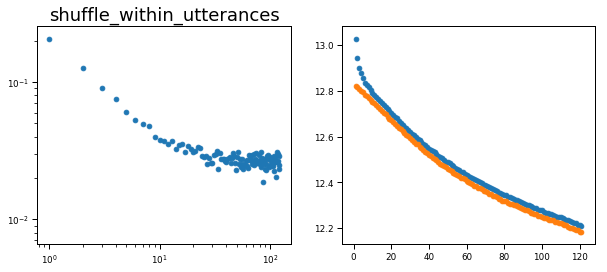

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  99 out of 121 | elapsed:    4.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    4.7s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  99 out of 121 | elapsed:    4.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    4.7s finished


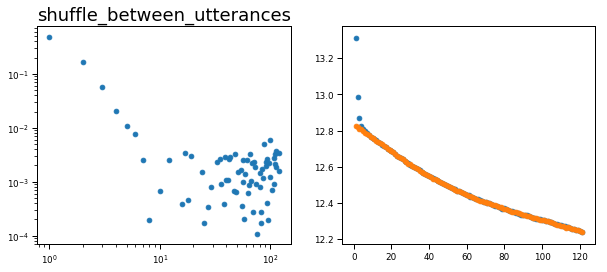

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  99 out of 121 | elapsed:    3.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    4.4s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  99 out of 121 | elapsed:    4.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    4.6s finished


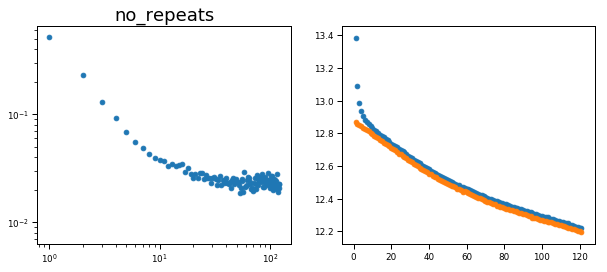

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  99 out of 121 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    2.8s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  99 out of 121 | elapsed:    2.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    2.7s finished


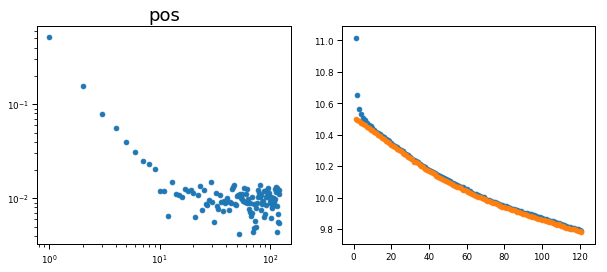

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  99 out of 121 | elapsed:    4.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    4.7s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  99 out of 121 | elapsed:    4.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 121 out of 121 | elapsed:    4.7s finished


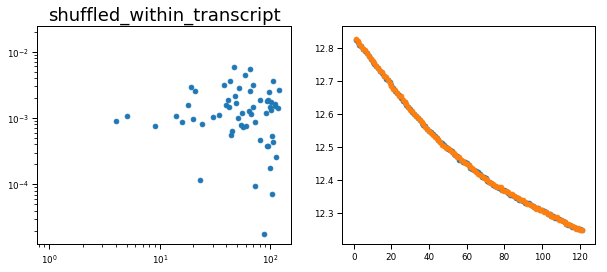

['you', 'mean', 'uh', 'um', 'like']
['um' 'um' 'he' 'then' 'three']
['pro:per', 'v', 'conj', 'n:prop', 'coord']
['um', 'mean', 'or', 'uh', 'you']
['once', 'um', 'when', 'I', 'came']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 394 out of 394 | elapsed:  1.5min finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 394 out of 394 | elapsed:  1.5min finished


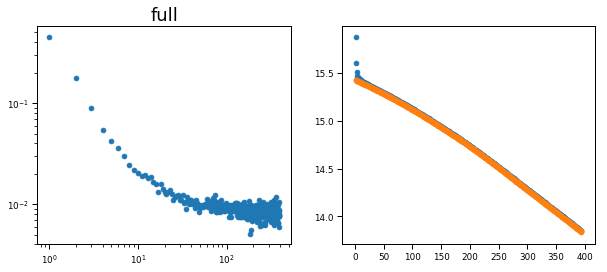

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 394 out of 394 | elapsed:  1.5min finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 394 out of 394 | elapsed:  1.5min finished


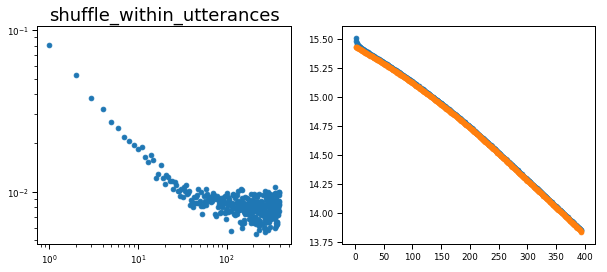

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 394 out of 394 | elapsed:  1.5min finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 394 out of 394 | elapsed:  1.5min finished


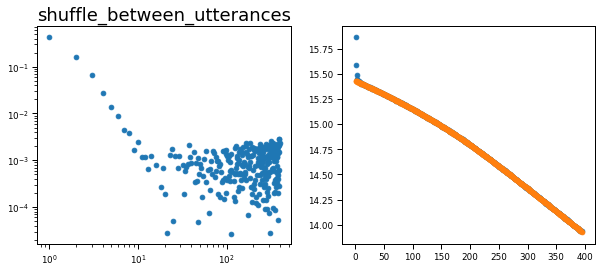

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 394 out of 394 | elapsed:  1.4min finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 394 out of 394 | elapsed:  1.5min finished


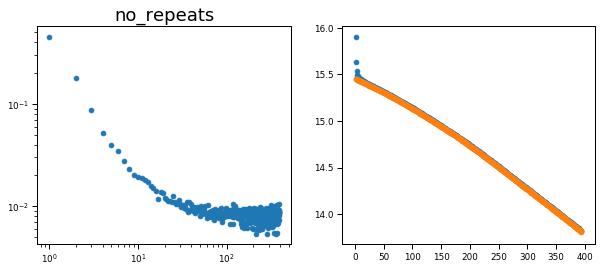

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 394 out of 394 | elapsed:   38.9s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 394 out of 394 | elapsed:   39.6s finished


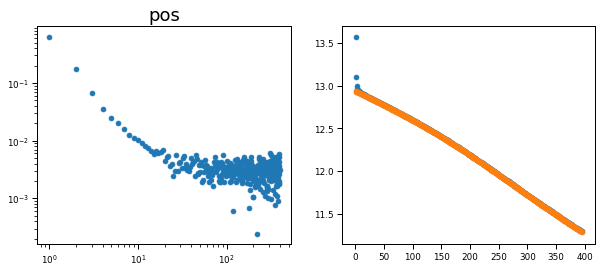

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 394 out of 394 | elapsed:  1.5min finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 394 out of 394 | elapsed:  1.5min finished


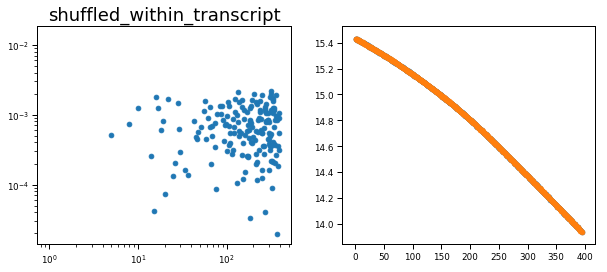

In [25]:
mi_estimation = "grassberger"
mi_df = pd.DataFrame(
    columns=[
        "MI",
        "MI_var",
        "shuff_MI",
        "shuff_MI_var",
        "distances",
        "age_cohort_low",
        "age_cohort_high",
        "n_words",
        "n_unique_words",
        "top_10_words",
        "median_n_words",
        "shuffling"
    ]
)
# for each age cohort
for (age_cohort_low, age_cohort_high) in tqdm(age_cohorts):
    cohort_subset = transcript_df[
        (transcript_df.age_months / 12 > age_cohort_low)
        & (transcript_df.age_months / 12 <= age_cohort_high)
    ]

    cohort_words = [[i for i in list(flatten(row.words)) if i not in [None, 'xxx']] 
                    for ri, (idx, row) in enumerate(cohort_subset.iterrows())]
    print(cohort_words[0][:5])
    
    shuffled_within_transcript = [np.random.permutation(i) for i in cohort_words]
    print(shuffled_within_transcript[0][:5])

    cohort_pos = [[i for i in np.concatenate(i) if i != ''] for i in cohort_subset.POS.values ]
    print(cohort_pos[0][:5])
    
    shuffled_within_utterance = [
        list(flatten([np.random.permutation([i for i in seq if i not in [None, "xxx"]]) for seq in row.words]))
        for idx, row in cohort_subset.iterrows()
    ]
    print(shuffled_within_utterance[0][:5])
    
    shuffled_between_utterance = [
        list(flatten(np.random.permutation([[i for i in seq if i not in [None, "xxx"]] for seq in row.words])))
        for idx, row in cohort_subset.iterrows()
    ]
    print(shuffled_between_utterance[0][:5])
    
    # no repeats
    cohort_words_no_repeats = [
        remove_repeats([i for i in list(flatten(row.words)) if i not in [None, "xxx"]])
        for idx, row in cohort_subset.iterrows()
    ]
    
    
    # make each phone symbol specific to the transcript
    for transcript_i, (idx, row) in enumerate(cohort_subset.iterrows()):
        cohort_words[transcript_i] = [str(transcript_i) + i for i in cohort_words[transcript_i]]
        shuffled_within_transcript[transcript_i] = [str(transcript_i) + i for i in shuffled_within_transcript[transcript_i]]
        shuffled_within_utterance[transcript_i] = [str(transcript_i) + i for i in shuffled_within_utterance[transcript_i]]
        shuffled_between_utterance[transcript_i] = [str(transcript_i) + i for i in shuffled_between_utterance[transcript_i]]
        cohort_words_no_repeats[transcript_i] = [str(transcript_i) + i for i in cohort_words_no_repeats[transcript_i]]    
        cohort_pos[transcript_i] = [str(transcript_i) + i for i in cohort_pos[transcript_i]]    

    n_words = len(np.concatenate(cohort_words))
    n_unique_words = len(np.unique(np.concatenate(cohort_words)))
    top_10_words = np.nan
    
    
    median_n_words = int(np.median([len(i) for i in cohort_words]))
    distances = np.arange(1, np.max([100, median_n_words]) + 1)
    #distances= np.unique(np.logspace(0,12, base=2, num = 10000).astype('int'))

    
    (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
        cohort_words, distances=distances, n_jobs=-1, mi_estimation=mi_estimation
    )

    mi_df.loc[len(mi_df)] = [
        MI,
        MI_var,
        shuff_MI,
        shuff_MI_var,
        distances,
        age_cohort_low,
        age_cohort_high,
        n_words,
        n_unique_words,
        top_10_words,
        median_n_words,
        "full"
    ]
    quickplot_decay(distances, MI, shuff_MI, title='full')

    (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
        shuffled_within_utterance, distances=distances, n_jobs=-1
    )

    mi_df.loc[len(mi_df)] = [
        MI,
        MI_var,
        shuff_MI,
        shuff_MI_var,
        distances,
        age_cohort_low,
        age_cohort_high,
        n_words,
        n_unique_words,
        top_10_words,
        median_n_words,
        "shuffle_within_utterances"
    ]
    quickplot_decay(distances, MI, shuff_MI, title='shuffle_within_utterances')

    (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
        shuffled_between_utterance, distances=distances, n_jobs=-1
    )


    mi_df.loc[len(mi_df)] = [
        MI,
        MI_var,
        shuff_MI,
        shuff_MI_var,
        distances,
        age_cohort_low,
        age_cohort_high,
        n_words,
        n_unique_words,
        top_10_words,
        median_n_words,
        "shuffle_between_utterances"
    ]
    quickplot_decay(distances, MI, shuff_MI, title='shuffle_between_utterances')

    (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
        cohort_words_no_repeats, distances=distances, n_jobs=-1
    )


    mi_df.loc[len(mi_df)] = [
        MI,
        MI_var,
        shuff_MI,
        shuff_MI_var,
        distances,
        age_cohort_low,
        age_cohort_high,
        n_words,
        n_unique_words,
        top_10_words,
        median_n_words,
        "no_repeats"
    ]
    quickplot_decay(distances, MI, shuff_MI, title='no_repeats')
    
    (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
        cohort_pos, distances=distances, n_jobs=-1
    )


    mi_df.loc[len(mi_df)] = [
        MI,
        MI_var,
        shuff_MI,
        shuff_MI_var,
        distances,
        age_cohort_low,
        age_cohort_high,
        n_words,
        n_unique_words,
        top_10_words,
        median_n_words,
        "pos"
    ]
    quickplot_decay(distances, MI, shuff_MI, title='pos')
    
    
    (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
        shuffled_within_transcript, distances=distances, n_jobs=-1
    )
    mi_df.loc[len(mi_df)] = [
        MI,
        MI_var,
        shuff_MI,
        shuff_MI_var,
        distances,
        age_cohort_low,
        age_cohort_high,
        n_words,
        n_unique_words,
        top_10_words,
        median_n_words,
        "shuffled_within_transcript"
    ]
    quickplot_decay(distances, MI, shuff_MI, title='shuffled_within_transcript')
    
    mi_df.to_pickle(DATA_DIR / "mi" / "childes_mi_full_median_shuffled.pickle")

In [26]:
mi_df[:3]

,MI,MI_var,shuff_MI,shuff_MI_var,distances,age_cohort_low,age_cohort_high,n_words,n_unique_words,top_10_words,median_n_words,shuffling
0,"[11.284785551820306, 11.07337340597912, 10.962...","[0.012132460827340517, 0.011977886679756525, 0...","[10.769425720743001, 10.740320650179003, 10.71...","[0.01151277952640151, 0.01159371678627942, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,1.5,15154,5439,NaN,38,full
1,"[11.17552222061179, 11.025854782677685, 10.947...","[0.011992495398434897, 0.011940992151928976, 0...","[10.770952584728056, 10.745712423437514, 10.72...","[0.011518514743174987, 0.011602685348349469, 0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,1.5,15154,5439,NaN,38,shuffle_within_utterances
2,"[11.066789609819926, 10.835337733067899, 10.77...","[0.011846333255002107, 0.011656988517723814, 0...","[10.782563066150653, 10.743549662551684, 10.73...","[0.01151692231709228, 0.011562181130191248, 0....","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,1.5,15154,5439,NaN,38,shuffle_between_utterances


full


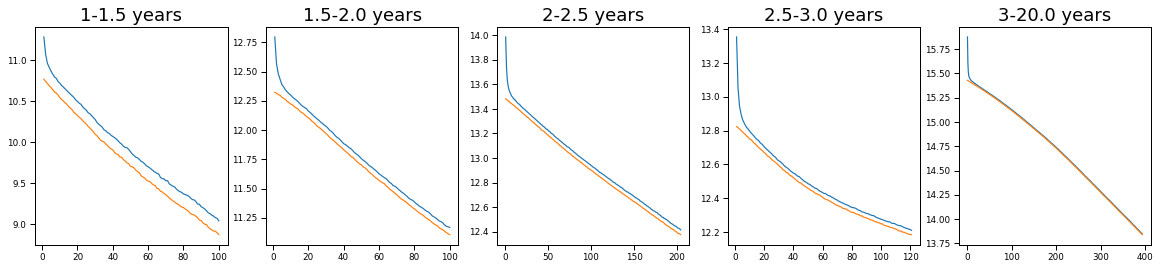

shuffle_within_utterances


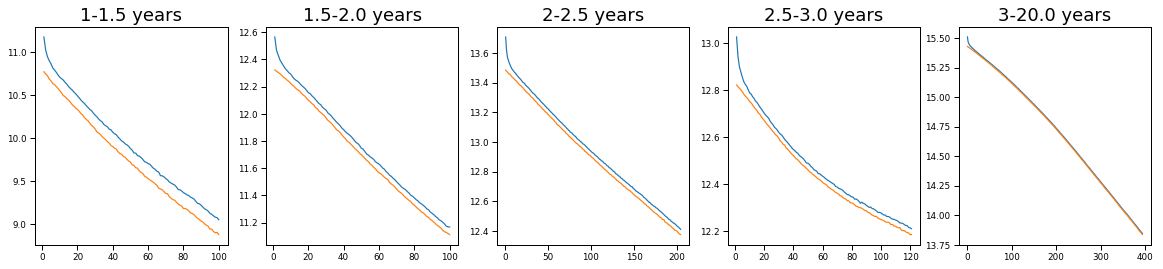

shuffle_between_utterances


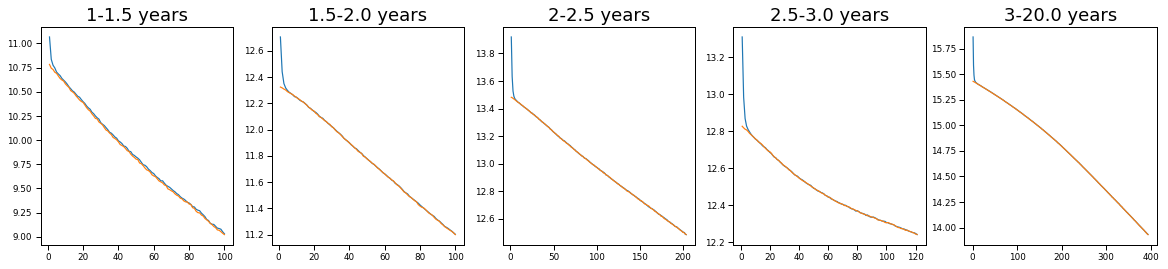

no_repeats


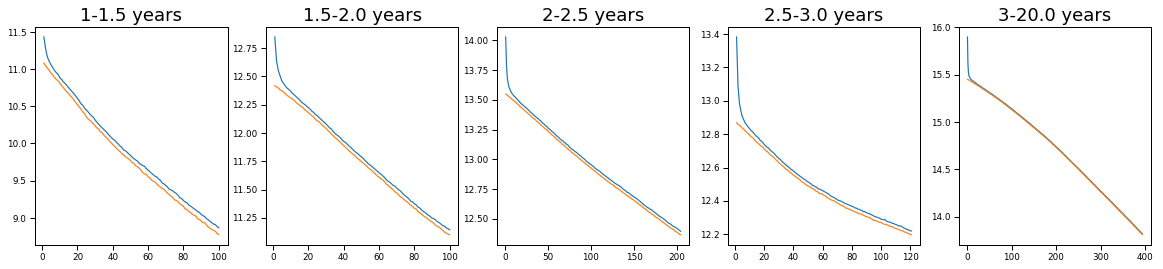

pos


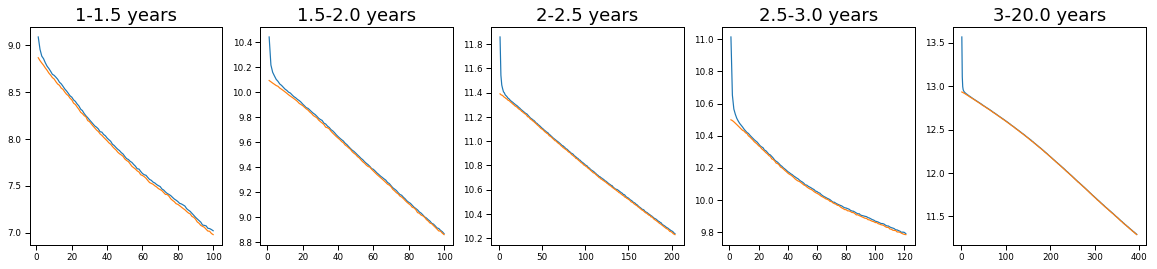

shuffled_within_transcript


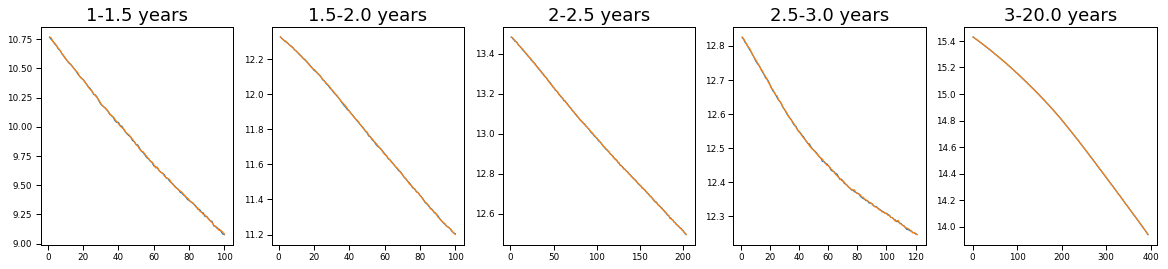

In [27]:
for shuff in ['full', 'shuffle_within_utterances', 'shuffle_between_utterances', 'no_repeats', 'pos', "shuffled_within_transcript"]:
    print(shuff)
    fig, axs = plt.subplots(ncols=len(age_cohorts), figsize=(4*len(age_cohorts),4))
    for idx, row in mi_df.iterrows():
        if row.shuffling != shuff: 
            continue
        MI = row.MI-row.shuff_MI
        MI_var = row.MI_var
        #ax.scatter(distances, row.MI-row.shuff_MI)
        ax = axs[np.array([i[0] for i in age_cohorts]) == row.age_cohort_low][0]
        #ax.plot(distances, row.MI-row.shuff_MI, label = '{}-{} years'.format(row.age_cohort_low, row.age_cohort_high), lw=3)
        ax.plot(row.distances, row.MI)#, s=10, color='k')
        ax.plot(row.distances, row.shuff_MI)#, color='k')
        #ax.fill_between(row.distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
        #ax.legend()
        ax.set_title('{}-{} years'.format(row.age_cohort_low, row.age_cohort_high))
        #ax.set_ylim([1e-3,5])
        #ax.set_xlim([1, 100])

        #ax.set_yscale('log')
        #ax.set_xscale('log')
    plt.show()

In [1]:
for shuff in ['full', 'shuffle_within_utterances', 'shuffle_between_utterances', 'no_repeats', 'pos', "shuffled_within_transcript"]:
    print(shuff)
    fig, axs = plt.subplots(ncols=len(age_cohorts), figsize=(4*len(age_cohorts),4))
    for idx, row in mi_df.iterrows():
        if row.shuffling != shuff: 
            continue
        MI = row.MI-row.shuff_MI
        MI_var = row.MI_var
        #ax.scatter(distances, row.MI-row.shuff_MI)
        ax = axs[np.array([i[0] for i in age_cohorts]) == row.age_cohort_low][0]
        #ax.plot(distances, row.MI-row.shuff_MI, label = '{}-{} years'.format(row.age_cohort_low, row.age_cohort_high), lw=3)
        ax.scatter(row.distances, row.MI-row.shuff_MI, s=10, color='k')
        ax.fill_between(row.distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
        #ax.legend()
        ax.set_title('{}-{} years'.format(row.age_cohort_low, row.age_cohort_high))
        #ax.set_ylim([1e-3,5])
        #ax.set_xlim([1, 100])

        ax.set_yscale('log')
        ax.set_xscale('log')
    plt.show()

full


NameError: name 'plt' is not defined

In [2]:
for shuff in ['full', 'shuffle_within_utterances', 'shuffle_between_utterances', 'no_repeats', 'pos', "shuffled_within_transcript"]:
    print(shuff)
    fig, axs = plt.subplots(ncols=len(age_cohorts), figsize=(4*len(age_cohorts),4))

    for axi, (idx, row) in enumerate(mi_df.iterrows()):
        if row.shuffling != shuff: 
            continue
        MI = row.MI-row.shuff_MI
        MI_var = row.MI_var
        #ax.scatter(distances, row.MI-row.shuff_MI)
        ax = axs[np.array([i[0] for i in age_cohorts]) == row.age_cohort_low][0]
        #ax.plot(distances, row.MI-row.shuff_MI, label = '{}-{} years'.format(row.age_cohort_low, row.age_cohort_high), lw=3)
        ax.plot(row.distances, row.MI, color='k')
        ax.plot(row.distances, row.shuff_MI, color='b')
        #ax.fill_between(row.distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
        #ax.legend()
        ax.set_title('{}-{} years'.format(row.age_cohort_low, row.age_cohort_high))
        #ax.set_ylim([1e-4,1])
        #ax.set_xlim([1, 100])

        ax.set_yscale('log')
        ax.set_xscale('log')
    plt.show()

full


NameError: name 'plt' is not defined